<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/filtermethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
data={
    "A":[10,10,10,10,10],
    "B":[23,23,23,23,24],
    "c":[2,2,2,2,2],
    "d":[1,2,3,4,5],
    "e":[1,2,3,4,5]
}
df=pd.DataFrame(data)
vt=VarianceThreshold(threshold=0)
vt.fit(df)
vt1=VarianceThreshold(threshold=0.2)
vt1.fit(df)
cf1=df.columns[~vt1.get_support()]
print(cf1)
constant_features=df.columns[~vt.get_support()]
print(constant_features)


#duplicate features
duplicate=df.T.duplicated()
du_cols=df.columns[duplicate].tolist()
print(du_cols)

Index(['A', 'B', 'c'], dtype='object')
Index(['A', 'c'], dtype='object')
['e']


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# mlxtend for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFE

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
logreg = LogisticRegression(max_iter=5000, solver='liblinear')

# -------------------
# 2.1 Forward Selection
sfs_forward = SFS(logreg,
                  k_features=5,          # pick 5 best features
                  forward=True,
                  floating=False,
                  scoring='accuracy',
                  cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)
print("Forward Selection Features:", sfs_forward.k_feature_names_)

# -------------------
# 2.2 Backward Selection
sfs_backward = SFS(logreg,
                   k_features=5,
                   forward=False,
                   floating=False,
                   scoring='accuracy',
                   cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)
print("Backward Selection Features:", sfs_backward.k_feature_names_)

# -------------------
# 2.3 Exhaustive Search
efs = EFS(logreg,
          min_features=3,
          max_features=5,
          scoring='accuracy',
          cv=3)
efs = efs.fit(X_train, y_train)
print("Exhaustive Search Best Features:", efs.best_idx_)

# -------------------
# 2.4 Recursive Feature Elimination (RFE)
rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
print("RFE Selected Features:", X_train.columns[rfe.support_].tolist())

# -------------------
# Evaluate one (example with RFE)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logreg.fit(X_train_rfe, y_train)
y_pred = logreg.predict(X_test_rfe)
print("Accuracy with RFE features:", accuracy_score(y_test, y_pred))


Forward Selection Features: ('mean radius', 'mean perimeter', 'texture error', 'worst texture', 'worst perimeter')
Backward Selection Features: ('mean radius', 'texture error', 'area error', 'worst texture', 'worst concavity')


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Load Dataset (Diabetes dataset as example)
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define Models
models = {
    "LASSO": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "DecisionTree": DecisionTreeRegressor(max_depth=4, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel="linear")
}

# Step 4: Train, Predict, Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, np.sqrt(mse), r2])

# Step 5: Display Results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "RMSE", "R² Score"])
print(results_df)


          Model          MSE        MAE       RMSE  R² Score
0         LASSO  2798.193485  42.854428  52.897954  0.471855
1         Ridge  3077.415939  46.138858  55.474462  0.419153
2    ElasticNet  4775.466767  60.349843  69.104752  0.098654
3  DecisionTree  3568.965261  47.045392  59.740817  0.326375
4  RandomForest  2952.010589  44.053034  54.332408  0.442823
5           SVM  5190.387663  61.904533  72.044345  0.020340


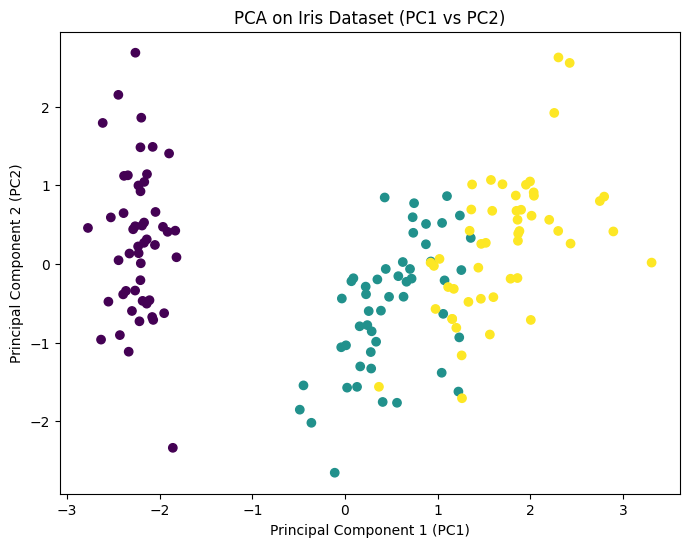


🔹 Variable contributions to PC1 and PC2:
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

🔹 Explained Variance Ratio per PC:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%

✅ Percentage variance explained by PC1: 72.96%
✅ Percentage variance explained by PC2: 22.85%
✅ Total (PC1 + PC2): 95.81%

✅ Number of PCs explaining >80% variance: 2


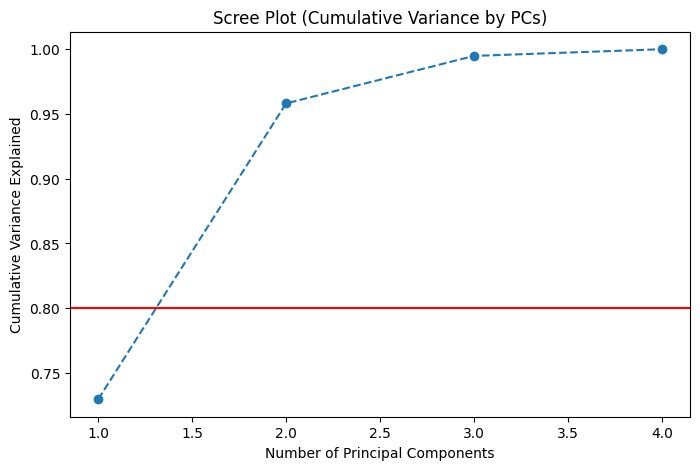

In [ ]:
# ============================
# Step 1: Import Libraries
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ============================
# Step 2: Load the Iris Dataset
# ============================
# Iris dataset has 150 samples, 4 features (sepal length, sepal width, petal length, petal width)
iris = load_iris()
X = iris.data         # feature values
y = iris.target       # labels (0 = setosa, 1 = versicolor, 2 = virginica)
features = iris.feature_names  # feature names

# ============================
# Step 3: Standardize the Data
# ============================
# PCA is variance-based, so features with large units (like petal length vs sepal width)
# can dominate the results. StandardScaler converts features to mean=0, std=1.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ============================
# Step 4: Apply PCA
# ============================
# PCA will transform the dataset into new axes (PC1, PC2, etc.)
pca = PCA()
X_pca = pca.fit_transform(X_std)

# ============================
# Step 5: Scatter Plot of PC1 vs PC2
# ============================
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA on Iris Dataset (PC1 vs PC2)")
#plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
plt.show()

# ============================
# Step 6: Variable Contributions (Loadings)
# ============================
# The PCA "components_" matrix shows how much each original feature contributes
# to each principal component.
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(features))],
    index=features
)
print("\n🔹 Variable contributions to PC1 and PC2:")
print(loadings[["PC1","PC2"]])

# ============================
# Step 7: Variance Explained
# ============================
# Explained variance ratio shows how much of the dataset's variance is captured by each PC.
explained_variance = pca.explained_variance_ratio_
print("\n🔹 Explained Variance Ratio per PC:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var*100:.2f}%")

print(f"\n✅ Percentage variance explained by PC1: {explained_variance[0]*100:.2f}%")
print(f"✅ Percentage variance explained by PC2: {explained_variance[1]*100:.2f}%")
print(f"✅ Total (PC1 + PC2): {(explained_variance[0]+explained_variance[1])*100:.2f}%")

# ============================
# Step 8: PCs Explaining >80% Variance
# ============================
# We check the cumulative variance and see how many PCs are required
cumulative_variance = np.cumsum(explained_variance)
num_pcs_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"\n✅ Number of PCs explaining >80% variance: {num_pcs_80}")

# ============================
# Step 9: Scree Plot (Optional but Useful)
# ============================
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Scree Plot (Cumulative Variance by PCs)")
plt.show()
